In [105]:
import matplotlib.pyplot as plt
import six
import sys
import tensorflow as tf
from tensorflow.python.ops import math_ops

sys.path.append("/Users/simon.cazals/Desktop/projects/steel/steel/")

In [106]:
from deeplab import common
from deeplab import model
from deeplab.datasets import data_generator

In [107]:
flags = tf.app.flags
FLAGS = flags.FLAGS

In [108]:
dataset = 'steel'
train_split = 'train'
dataset_dir = '/Users/simon.cazals/Desktop/projects/steel/data/tfrecord/'
train_crop_size = [256, 256]
min_resize_value, max_resize_value = None, None
batch_size=1
resize_factor = None
min_scale_factor, max_scale_factor = 1, 1
# min_scale_factor, max_scale_factor = 0.5, 2
scale_factor_step_size = 0.1
model_variant = 'xception_65'

In [109]:
dataset = data_generator.Dataset(
                dataset_name=dataset,
                split_name=train_split,
                dataset_dir=dataset_dir,
                batch_size=batch_size,
                crop_size=[int(sz) for sz in train_crop_size],
                min_resize_value=min_resize_value,
                max_resize_value=max_resize_value,
                resize_factor=resize_factor,
                min_scale_factor=min_scale_factor,
                max_scale_factor=max_scale_factor,
                scale_factor_step_size=scale_factor_step_size,
                model_variant=model_variant,
                num_readers=2,
                is_training=True,
                should_shuffle=True,
                should_repeat=True)

In [111]:
data_iterator = dataset.get_one_shot_iterator()

In [114]:
init_op = tf.initialize_all_variables()

data = data_iterator.get_next()
# print(data)
image = data['image']
image_name = data['image_name']

#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    image = sess.run(image)[0] / 255
    image_name = sess.run(image_name)

[b'../data/train_images/ea6227174.jpg']


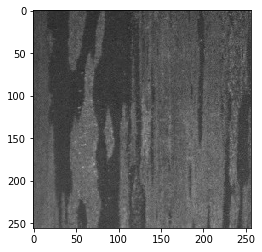

In [115]:
print(image_name)
plt.imshow(image)
plt.show()